In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/PCOS_extended_dataset.csv')

In [ ]:
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,193,193,0,30,69.979147,167.708055,23.185569,12,72,22,...,1,0.0,1,105.483401,76.096379,2,4,10.0,13.0,6.176029
1,360,360,0,36,63.711688,154.055877,25.441392,13,70,18,...,1,0.0,1,115.883740,79.117243,2,3,13.0,11.0,6.824718
2,10,10,0,36,51.848631,149.059804,23.928264,15,80,20,...,0,0.0,0,112.219711,80.919417,1,1,14.0,17.0,2.568691
3,278,278,1,29,66.893988,148.628036,27.894935,15,72,18,...,0,0.0,1,104.619624,69.902681,1,1,12.0,14.0,9.962732
4,71,71,0,33,52.536198,150.767409,23.079564,13,72,18,...,0,0.0,0,99.175454,70.330461,5,2,11.5,4.7,6.655190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,87,87,0,31,66.948922,155.976858,26.662263,15,74,18,...,0,0.0,0,120.323951,83.738573,8,10,15.0,13.0,9.816150
1996,508,508,0,37,64.592788,151.979792,27.681715,11,74,20,...,0,1.0,0,109.738395,76.083303,6,6,19.0,19.0,7.930382
1997,166,166,0,32,47.750129,148.596447,20.041406,11,73,26,...,1,1.0,0,109.570220,61.778231,5,5,14.0,13.0,6.832224
1998,266,266,0,40,31.869660,152.589988,13.793101,15,72,20,...,0,1.0,1,119.456176,79.410616,6,5,18.0,17.0,7.636086


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  2000 non-null   int64  
 1   Patient File No.        2000 non-null   int64  
 2   PCOS (Y/N)              2000 non-null   int64  
 3    Age (yrs)              2000 non-null   int64  
 4   Weight (Kg)             2000 non-null   float64
 5   Height(Cm)              2000 non-null   float64
 6   BMI                     2000 non-null   float64
 7   Blood Group             2000 non-null   int64  
 8   Pulse rate(bpm)         2000 non-null   int64  
 9   RR (breaths/min)        2000 non-null   int64  
 10  Hb(g/dl)                2000 non-null   float64
 11  Cycle(R/I)              2000 non-null   int64  
 12  Cycle length(days)      2000 non-null   int64  
 13  Marraige Status (Yrs)   1997 non-null   float64
 14  Pregnant(Y/N)           2000 non-null   

In [ ]:
# Replacing non-numeric values with NaN, then fill or drop them as needed
X = df.drop(['PCOS (Y/N)', 'Sl. No', 'Patient File No.'], axis=1, errors='ignore')
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, replacing invalid strings with NaN

# Handling any NaN values in the feature set
X.fillna(X.median(), inplace=True)  # Impute NaN values with column medians

y = df['PCOS (Y/N)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)

try:
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
except ValueError as e:
    print(f"Error during SMOTE: {e}")
    raise

print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution before SMOTE:
PCOS (Y/N)
0    974
1    426
Name: count, dtype: int64

Class distribution after SMOTE:
PCOS (Y/N)
0    974
1    974
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,266.633000,266.633000,0.304000,31.35400,59.527068,156.416496,24.284184,13.788000,73.241000,19.232000,...,0.477000,0.517000,0.257500,114.701590,76.989127,6.09000,6.50350,14.879300,15.410320,8.571637
std,154.058467,154.058467,0.460098,5.44982,11.445212,6.044243,4.132187,1.832958,4.098941,1.740601,...,0.499596,0.499836,0.437366,7.564600,6.085313,4.23094,4.37362,3.641161,3.270965,2.217999
min,1.000000,1.000000,0.000000,20.00000,30.739215,136.539081,11.939138,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,11.525778,7.680842,0.00000,0.00000,0.000000,0.000000,0.000000
25%,132.000000,132.000000,0.000000,28.00000,52.248684,152.169130,21.765743,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,109.564746,72.433707,3.00000,3.00000,13.000000,13.000000,7.099641
50%,267.000000,267.000000,0.000000,31.00000,58.538632,156.433674,24.188981,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,114.558163,78.340745,5.00000,6.00000,15.000000,16.000000,8.434753
75%,395.000000,395.000000,1.000000,35.00000,65.519518,160.064790,26.600461,15.000000,74.000000,20.000000,...,1.000000,1.000000,1.000000,120.190386,81.186301,8.25000,9.00000,18.000000,18.000000,9.876932
max,541.000000,541.000000,1.000000,48.00000,113.379053,180.388539,40.449415,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,144.980616,104.267012,22.00000,20.00000,24.000000,24.000000,18.675452


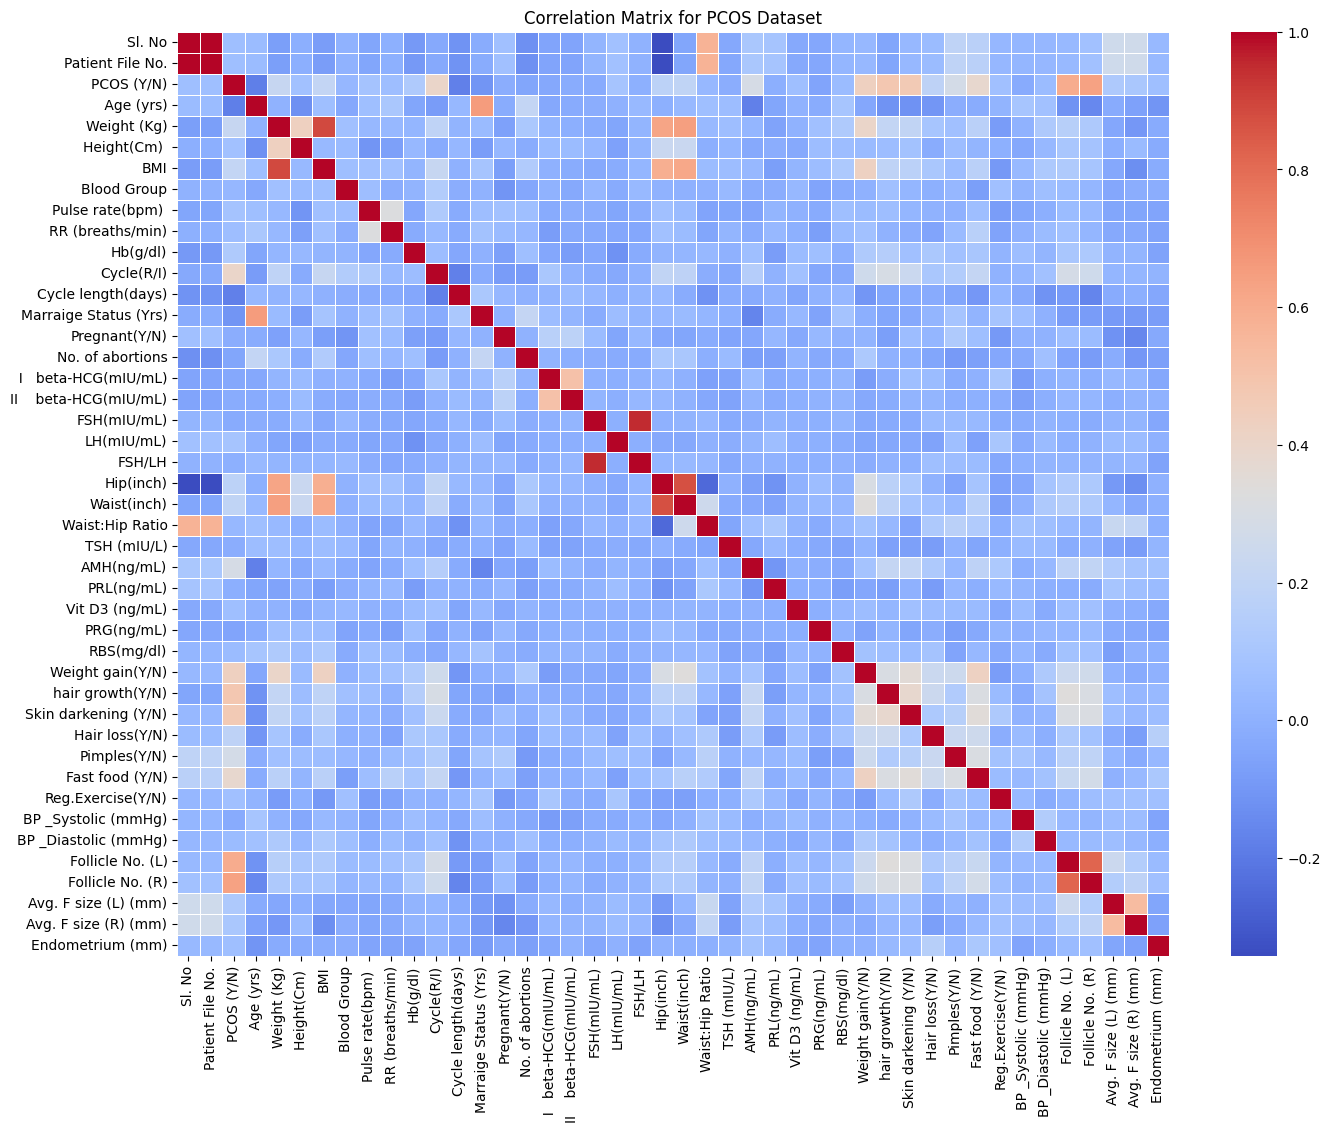

Features most positively correlated with PCOS:
PCOS (Y/N)              1.000000
Follicle No. (R)        0.634140
Follicle No. (L)        0.599351
hair growth(Y/N)        0.482538
Skin darkening (Y/N)    0.466360
Weight gain(Y/N)        0.431333
Cycle(R/I)              0.398291
Fast food (Y/N)         0.384289
AMH(ng/mL)              0.290159
Pimples(Y/N)            0.278531
Name: PCOS (Y/N), dtype: float64

Features most negatively correlated with PCOS:
TSH (mIU/L)              -0.015737
II    beta-HCG(mIU/mL)   -0.019424
FSH(mIU/mL)              -0.025761
BP _Systolic (mmHg)      -0.026886
  I   beta-HCG(mIU/mL)   -0.035979
No. of abortions         -0.045524
PRG(ng/mL)               -0.050067
Marraige Status (Yrs)    -0.108281
Cycle length(days)       -0.176765
 Age (yrs)               -0.182594
Name: PCOS (Y/N), dtype: float64


In [ ]:
# Replacing non-numeric values with NaN, then impute or drop them
cleaned_dataset = df.apply(pd.to_numeric, errors='coerce')

cleaned_dataset.fillna(cleaned_dataset.median(), inplace=True)

correlation_matrix = cleaned_dataset.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for PCOS Dataset')
plt.show()

pcos_correlation = correlation_matrix['PCOS (Y/N)'].sort_values(ascending=False)
print("Features most positively correlated with PCOS:")
print(pcos_correlation.head(10))

print("\nFeatures most negatively correlated with PCOS:")
print(pcos_correlation.tail(10))

In [ ]:
def analyze_categorical_variables(df, target_variable='PCOS (Y/N)'):
    """
    Performing hypothesis testing on categorical variables to examine their association with PCOS.

    Args:
        df: The pandas DataFrame containing the data.
        target_variable: The name of the target variable (e.g., 'PCOS (Y/N)').

    Returns:
        A dictionary containing the results of the hypothesis tests.
    """

    results = {}

    # Iterate through categorical columns
    for column in df.select_dtypes(include=['object', 'category']):
        if column != target_variable:
            # Create contingency table
            contingency_table = pd.crosstab(df[column], df[target_variable])

            # Chi-Square Test
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Store results
            results[column] = {
                'chi2_statistic': chi2,
                'p_value': p,
                'degrees_of_freedom': dof,
                'expected_frequencies': expected
            }

    return results

results = analyze_categorical_variables(df)

# Print results
for column, result in results.items():
    print(f"Variable: {column}")
    print(f"Chi-Square Statistic: {result['chi2_statistic']}")
    print(f"p-value: {result['p_value']}")
    print(f"Degrees of Freedom: {result['degrees_of_freedom']}")
    print("Expected Frequencies:\n", result['expected_frequencies'])
    print("-" * 20)

Variable: II    beta-HCG(mIU/mL)
Chi-Square Statistic: 829.9503575165359
p-value: 6.30042678458597e-78
Degrees of Freedom: 199
Expected Frequencies:
 [[1.39200e+00 6.08000e-01]
 [3.48000e+00 1.52000e+00]
 [5.56800e+00 2.43200e+00]
 [2.78400e+00 1.21600e+00]
 [7.90656e+02 3.45344e+02]
 [3.48000e+00 1.52000e+00]
 [3.48000e+00 1.52000e+00]
 [6.26400e+00 2.73600e+00]
 [1.39200e+00 6.08000e-01]
 [4.17600e+00 1.82400e+00]
 [3.48000e+00 1.52000e+00]
 [4.17600e+00 1.82400e+00]
 [4.87200e+00 2.12800e+00]
 [3.48000e+00 1.52000e+00]
 [3.48000e+00 1.52000e+00]
 [1.39200e+00 6.08000e-01]
 [1.39200e+00 6.08000e-01]
 [2.08800e+00 9.12000e-01]
 [2.08800e+00 9.12000e-01]
 [1.39200e+00 6.08000e-01]
 [6.96000e-01 3.04000e-01]
 [6.96000e-01 3.04000e-01]
 [6.96000e-01 3.04000e-01]
 [2.08800e+00 9.12000e-01]
 [4.17600e+00 1.82400e+00]
 [4.87200e+00 2.12800e+00]
 [1.18320e+01 5.16800e+00]
 [2.08800e+00 9.12000e-01]
 [1.39200e+00 6.08000e-01]
 [1.39200e+00 6.08000e-01]
 [1.39200e+00 6.08000e-01]
 [4.17600e+00

<ipython-input-58-9623f9f5ea13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS (Y/N)', y='BMI', data=df, palette='Set2')
<ipython-input-58-9623f9f5ea13>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS (Y/N)', y='BP _Systolic (mmHg)', data=df, palette='Set2')


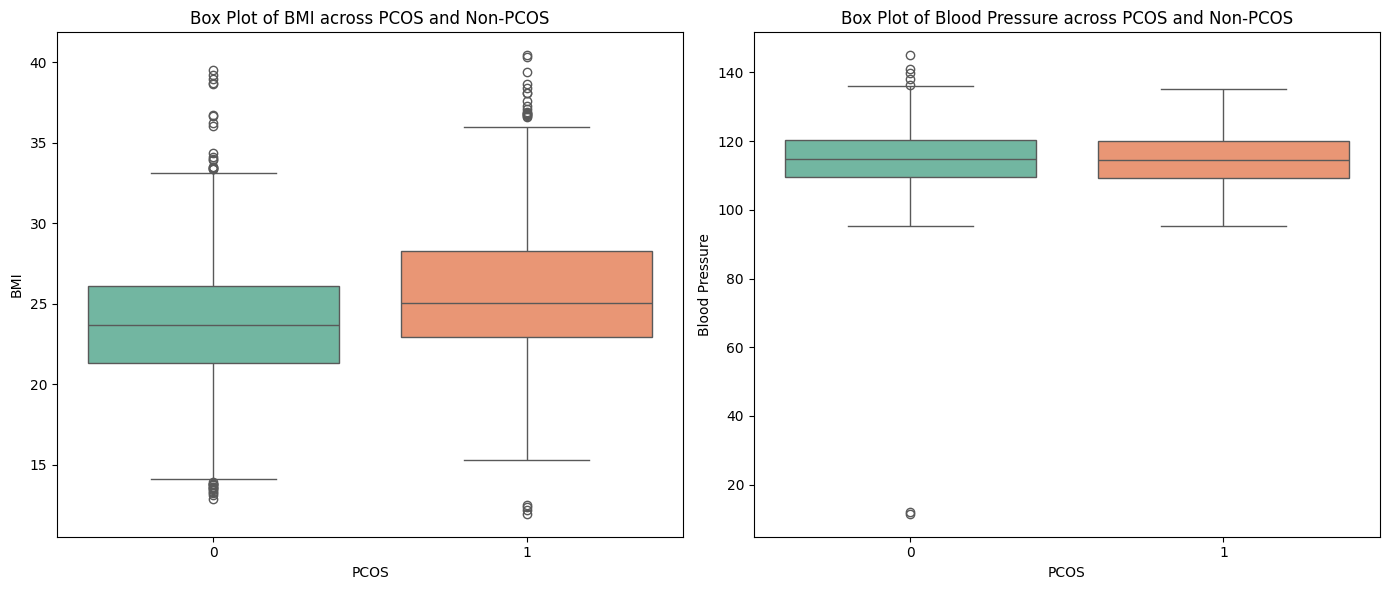

In [ ]:
# Box Plots for BMI and Blood Pressure across PCOS and non-PCOS groups
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
# Changed 'PCOS' to 'PCOS (Y/N)'
sns.boxplot(x='PCOS (Y/N)', y='BMI', data=df, palette='Set2')
plt.title('Box Plot of BMI across PCOS and Non-PCOS')
plt.xlabel('PCOS')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
# Changed 'PCOS' to 'PCOS (Y/N)'
# Make the same correction for the boxplot as well
sns.boxplot(x='PCOS (Y/N)', y='BP _Systolic (mmHg)', data=df, palette='Set2')
plt.title('Box Plot of Blood Pressure across PCOS and Non-PCOS')
plt.xlabel('PCOS')
plt.ylabel('Blood Pressure')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean of 'BMI' and 'Blood Pressure' for each row
df['Blood_Pressure_mean'] = df[['BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)']].mean(axis=1)

# Display the DataFrame with the new 'Mean' column
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Blood_Pressure_mean
0,193,193,0,30,69.979147,167.708055,23.185569,12,72,22,...,0.0,1,105.483401,76.096379,2,4,10.0,13.0,6.176029,90.789890
1,360,360,0,36,63.711688,154.055877,25.441392,13,70,18,...,0.0,1,115.883740,79.117243,2,3,13.0,11.0,6.824718,97.500491
2,10,10,0,36,51.848631,149.059804,23.928264,15,80,20,...,0.0,0,112.219711,80.919417,1,1,14.0,17.0,2.568691,96.569564
3,278,278,1,29,66.893988,148.628036,27.894935,15,72,18,...,0.0,1,104.619624,69.902681,1,1,12.0,14.0,9.962732,87.261153
4,71,71,0,33,52.536198,150.767409,23.079564,13,72,18,...,0.0,0,99.175454,70.330461,5,2,11.5,4.7,6.655190,84.752958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,87,87,0,31,66.948922,155.976858,26.662263,15,74,18,...,0.0,0,120.323951,83.738573,8,10,15.0,13.0,9.816150,102.031262
1996,508,508,0,37,64.592788,151.979792,27.681715,11,74,20,...,1.0,0,109.738395,76.083303,6,6,19.0,19.0,7.930382,92.910849
1997,166,166,0,32,47.750129,148.596447,20.041406,11,73,26,...,1.0,0,109.570220,61.778231,5,5,14.0,13.0,6.832224,85.674226
1998,266,266,0,40,31.869660,152.589988,13.793101,15,72,20,...,1.0,1,119.456176,79.410616,6,5,18.0,17.0,7.636086,99.433396


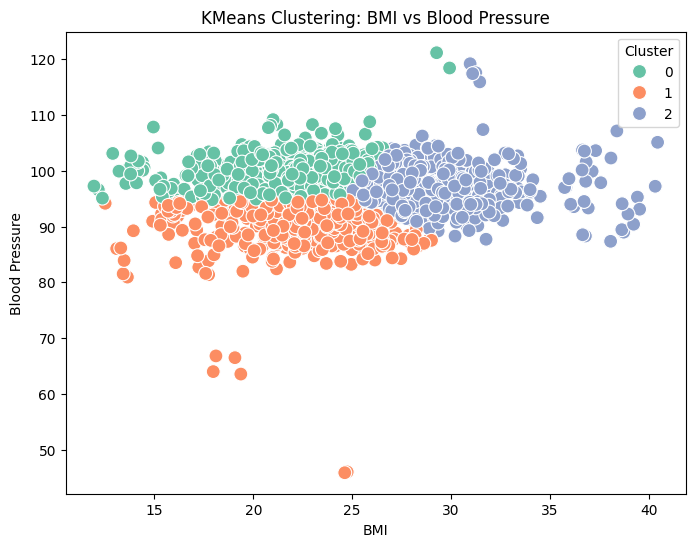

Cluster Centers (on original scale):
BMI: [22.10148139 22.48621597 28.74328645]
Blood Pressure: [99.31769485 90.64752392 96.87462555]

Dataframe with Cluster Assignments:


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Blood_Pressure_mean,Cluster
0,193,193,0,30,69.979147,167.708055,23.185569,12,72,22,...,1,105.483401,76.096379,2,4,10.0,13.0,6.176029,90.789890,1
1,360,360,0,36,63.711688,154.055877,25.441392,13,70,18,...,1,115.883740,79.117243,2,3,13.0,11.0,6.824718,97.500491,2
2,10,10,0,36,51.848631,149.059804,23.928264,15,80,20,...,0,112.219711,80.919417,1,1,14.0,17.0,2.568691,96.569564,0
3,278,278,1,29,66.893988,148.628036,27.894935,15,72,18,...,1,104.619624,69.902681,1,1,12.0,14.0,9.962732,87.261153,1
4,71,71,0,33,52.536198,150.767409,23.079564,13,72,18,...,0,99.175454,70.330461,5,2,11.5,4.7,6.655190,84.752958,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,87,87,0,31,66.948922,155.976858,26.662263,15,74,18,...,0,120.323951,83.738573,8,10,15.0,13.0,9.816150,102.031262,2
1996,508,508,0,37,64.592788,151.979792,27.681715,11,74,20,...,0,109.738395,76.083303,6,6,19.0,19.0,7.930382,92.910849,2
1997,166,166,0,32,47.750129,148.596447,20.041406,11,73,26,...,0,109.570220,61.778231,5,5,14.0,13.0,6.832224,85.674226,1
1998,266,266,0,40,31.869660,152.589988,13.793101,15,72,20,...,1,119.456176,79.410616,6,5,18.0,17.0,7.636086,99.433396,0


In [ ]:
X = df[['BMI', 'Blood_Pressure_mean']]

# Standardize the features to bring them to the same scale (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['BMI'], y=df['Blood_Pressure_mean'], hue=df['Cluster'], palette='Set2', s=100)
plt.title('KMeans Clustering: BMI vs Blood Pressure')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.legend(title='Cluster')
plt.show()

# Show the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers)  # Reverse the scaling for original scale
print("Cluster Centers (on original scale):")
print(f"BMI: {cluster_centers[:, 0]}")
print(f"Blood Pressure: {cluster_centers[:, 1]}")

# Display the dataframe with the assigned clusters
print("\nDataframe with Cluster Assignments:")
df

<ipython-input-66-ae453fcf9902>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)  # Impute NaN with median (or other strategy)
<ipython-input-66-ae453fcf9902>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


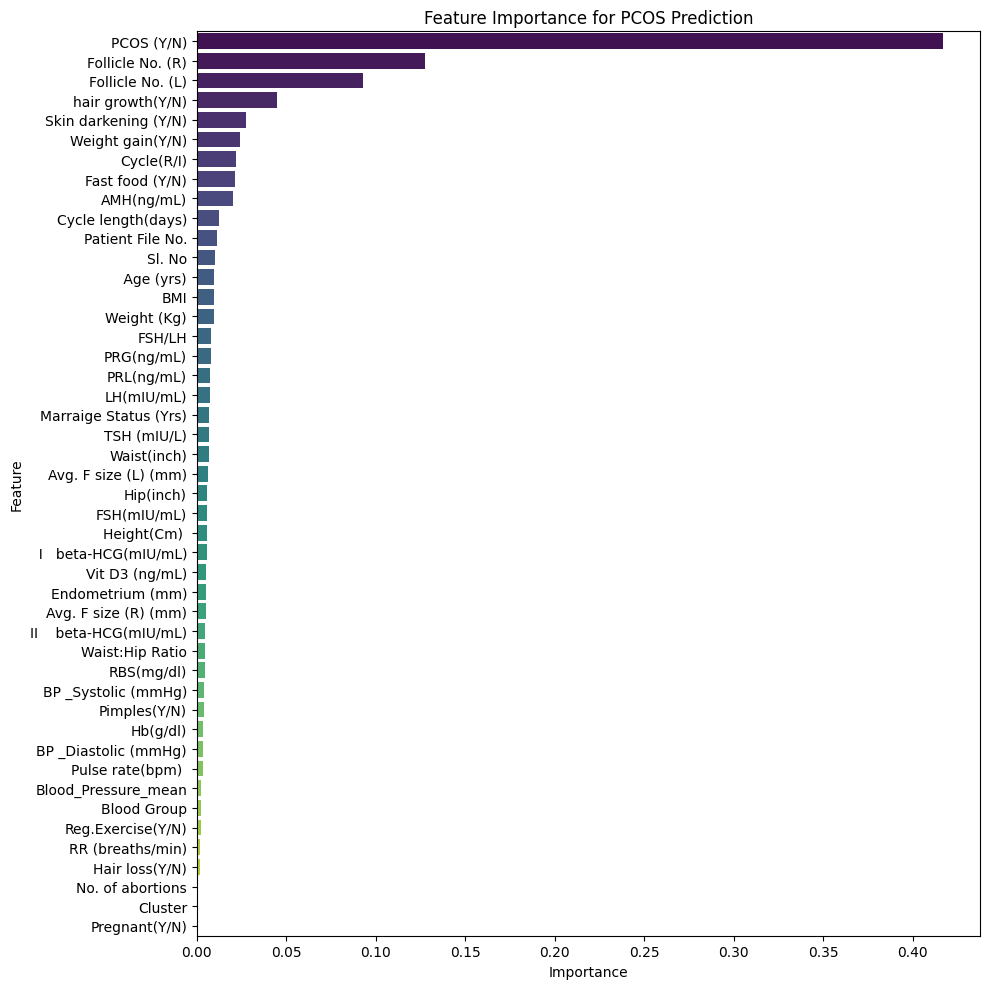

In [ ]:
# Encoding the target variable 'PCOS (Y/N)' (Yes = 1, No = 0)
le = LabelEncoder()
# Changed 'PCOS' to 'PCOS (Y/N)' to match the existing column name
df['PCOS'] = le.fit_transform(df['PCOS (Y/N)'])

# Feature selection (all columns except 'PCOS')
X = df.drop('PCOS', axis=1)
y = df['PCOS']

# Convert all columns in X to numeric, handling errors
for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col], errors='raise')
    except ValueError:
        # Handle the error, e.g., replace non-numeric values with NaN and then impute
        X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert non-numeric to NaN
        X[col].fillna(X[col].median(), inplace=True)  # Impute NaN with median (or other strategy)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances using a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for PCOS Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()